# Fake News Detection

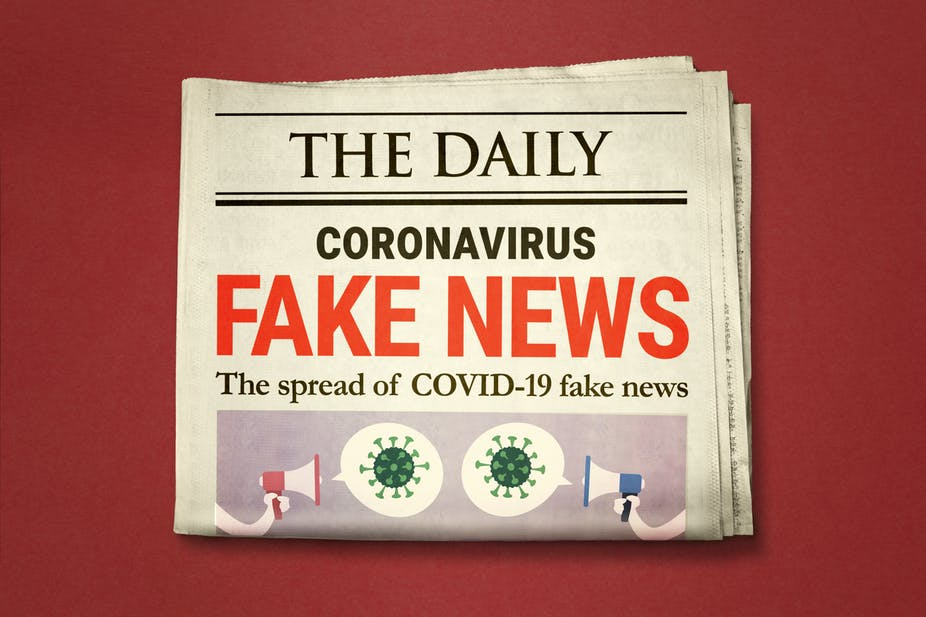

In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string

In [71]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [72]:
df_fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [73]:
df_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [74]:
df_fake["class"] = 0
df_true["class"] = 1

In [75]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [76]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480,23470, -1):
    df_fake.drop([i], axis=0, inplace=True)
df_true_manual_testing = df_true.tail(10)
for i in range(21416,21406, -1):
    df_true.drop([i], axis=0, inplace=True)

In [77]:
df_manual_testing = pd.concat([df_fake_manual_testing, df_true_manual_testing], axis=0)
df_manual_testing.to_csv("manual_testing.csv")

In [78]:
df_marge = pd.concat([df_fake, df_true], axis=0)
df_marge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [79]:
df = df_marge.drop(["title","subject", "date"], axis=1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [80]:
df = df.sample(frac=1)

In [81]:
df.head(10)

,text,class
17024,KIEV (Reuters) - Ukrainian lawmakers voted thr...,1
7444,TOKYO/SEOUL (Reuters) - Republican Donald Trum...,1
10049,Has anyone seen Barack Obama lately? What abou...,0
4000,"For like the eleventy-billionth time, Sarah Pa...",0
13284,PARIS/BAGHDAD (Reuters) - French President Emm...,1
16363,BERLIN (Reuters) - Three German parties resign...,1
9768,(Reuters) - U.S. Republican presidential front...,1
13837,It s too late for these countries who ve been ...,0
5125,WASHINGTON (Reuters) - The White House budget ...,1
17936,MOSCOW (Reuters) - Any escalation of tension o...,1


In [82]:
df.isnull().sum()

text     0
class    0
dtype: int64

In [86]:
def word_drop(text):
    text = text.lower()
    text = re.sub('\[.*?\]','', text)
    text = re.sub("\\W", " ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [89]:
df["text"] = df["text"].apply(word_drop)

In [90]:
df.head(10)

,text,class
17024,kiev reuters ukrainian lawmakers voted thr...,1
7444,tokyo seoul reuters republican donald trum...,1
10049,has anyone seen barack obama lately what abou...,0
4000,for like the eleventy billionth time sarah pa...,0
13284,paris baghdad reuters french president emm...,1
16363,berlin reuters three german parties resign...,1
9768,reuters u s republican presidential front...,1
13837,it s too late for these countries who ve been ...,0
5125,washington reuters the white house budget ...,1
17936,moscow reuters any escalation of tension o...,1


In [91]:
x = df["text"]
y = df["class"]

In [92]:
x_train, x_test, y_tarin, y_test = train_test_split(x,y, test_size = .25)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [94]:
vectrorization = TfidfVectorizer()
xv_train = vectrorization.fit_transform(x_train)
xv_test = vectrorization.transform(x_test)

##### Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
LR = LogisticRegression()
LR.fit(xv_train, y_tarin)

LogisticRegression()

In [97]:
LR.score(xv_test, y_test)

0.9863636363636363

In [98]:
pred_LR = LR.predict(xv_test)

In [99]:
print(classification_report(y_test, pred_LR))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5762
           1       0.98      0.99      0.99      5458

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



##### Decision Tree classification

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_tarin)

DecisionTreeClassifier()

In [102]:
DT.score(xv_test, y_test)

0.9953654188948307

In [103]:
pred_DT = DT.predict(xv_test)

In [104]:
print(classification_report(y_test, pred_DT))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5762
           1       0.99      1.00      1.00      5458

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



#### Gradient Boosting Classifier

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [107]:
GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(xv_train, y_tarin)

GradientBoostingClassifier(random_state=0)

In [108]:
GBC.score(xv_test, y_test)

0.9944741532976827

In [109]:
pred_GBC = GBC.predict(xv_test)

In [111]:
print(classification_report(y_test, pred_GBC))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5762
           1       0.99      1.00      0.99      5458

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



##### Random Forest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
RFC = RandomForestClassifier()
RFC.fit(xv_train, y_tarin)

RandomForestClassifier()

In [114]:
RFC.score(xv_test, y_test)

0.9892156862745098

In [115]:
pred_RFC = RFC.predict(xv_test)

In [116]:
print(classification_report(y_test, pred_RFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5762
           1       0.99      0.99      0.99      5458

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



##### Manual Testing

In [120]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(word_drop) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectrorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                              output_lable(pred_DT[0]), 
                                                                                                              output_lable(pred_GBC[0]), 
                                                                                                              output_lable(pred_RFC[0])))

In [127]:
news = str(input())
manual_testing(news)

Robert Fantina CounterpunchAlthough the United States is still ten months from its next exercise in electoral futility, most polls do not indicate what former Secretary of State Hillary Clinton is most anxious to see: a runaway victory for her candidacy. It is a good sign that, despite the fact that she has no real contrasting opponent on the Democratic side, the coronation she expected isn t going to happen.One might say that this writer focuses too much on Mrs. Clinton s adoration of Israel. But by looking at her comments about that apartheid nation, one gets a clear view of some broader, very troubling perspectives that Mrs. Clinton seems to hold.On January 6, an opinion piece appeared in The Jewish Journal, written by Mrs. Clinton. It is a fawning, maudlin essay, typical of the writing of anyone seeking national political office in the U.S. who knows they must pay homage to their Israeli lord and master. A few points from this essay tell much about Mrs. Clinton. I m especially conc